In [1]:
import linopy
import pandas as pd
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
from shapely import wkt
import numpy as np

In [2]:
coarsenscale = 5
lccs_resolution = 300 * coarsenscale #m
areapergrid = (lccs_resolution/1000) ** 2 ## km2

mwperkm2_wind = 4.5 ## originally 9 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET
mwperkm2_solar = 15 ## originally 30 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET

mwpergrid_wind = np.round(areapergrid * mwperkm2_wind,2)
mwpergrid_solar =  np.round(areapergrid * mwperkm2_solar,2)

print('areapergrid = ',areapergrid)
print('mwpergrid_wind = ',mwpergrid_wind)
print('mwpergrid_solar = ',mwpergrid_solar)

maxcapacityfor_spp = 90
maxcapacityfor_vspp = 10

rollingwindow_spp_wind = int(np.ceil(np.sqrt(maxcapacityfor_spp/mwpergrid_wind)))
# if ( rollingwindow_spp_wind % 2 == 0 ) : rollingwindow_spp_wind += 1
rollingwindow_vspp_wind = int(np.ceil(np.sqrt(maxcapacityfor_vspp/mwpergrid_wind)))
# if ( rollingwindow_vspp_wind % 2 == 0 ) : rollingwindow_vspp_wind += 1

print('rollingwindow_spp_wind = ',rollingwindow_spp_wind,' * ',rollingwindow_spp_wind,' = ', mwpergrid_wind * (rollingwindow_spp_wind**2))
print('rollingwindow_vspp_wind = ',rollingwindow_vspp_wind,' * ',rollingwindow_vspp_wind,' = ', mwpergrid_wind * (rollingwindow_vspp_wind**2))

rollingwindow_spp_solar = int(np.ceil(np.sqrt(maxcapacityfor_spp/mwpergrid_solar)))
# if ( rollingwindow_spp_solar % 2 == 0 ) : rollingwindow_spp_solar += 1
rollingwindow_vspp_solar = int(np.ceil(np.sqrt(maxcapacityfor_vspp/mwpergrid_solar)))
# if ( rollingwindow_vspp_solar % 2 == 0 ) : rollingwindow_vspp_solar += 1

print('rollingwindow_spp_solar = ',rollingwindow_spp_solar,' * ',rollingwindow_spp_solar,' = ', mwpergrid_solar * (rollingwindow_spp_solar**2))
print('rollingwindow_vspp_solar = ',rollingwindow_vspp_solar,' * ',rollingwindow_vspp_solar,' = ', mwpergrid_solar * (rollingwindow_vspp_solar**2))


areapergrid =  2.25
mwpergrid_wind =  10.12
mwpergrid_solar =  33.75
rollingwindow_spp_wind =  3  *  3  =  91.08
rollingwindow_vspp_wind =  1  *  1  =  10.12
rollingwindow_spp_solar =  2  *  2  =  135.0
rollingwindow_vspp_solar =  1  *  1  =  33.75


In [3]:
suitablearea_biomass = 150 ## km2
suitablearea_bgec = 150 ## km2
suitablearea_bgww = 150 ## km2
suitablearea_msw = 150 ## km2
suitablearea_iew = 150 ## km2

rollingwindow_spp_biomass = int(np.ceil(np.sqrt(suitablearea_biomass * 9 /areapergrid)))
rollingwindow_vspp_biomass = int(np.ceil(np.sqrt(suitablearea_biomass/areapergrid)))

rollingwindow_spp_bgec = int(np.ceil(np.sqrt(suitablearea_bgec * 9 /areapergrid)))
rollingwindow_vspp_bgec = int(np.ceil(np.sqrt(suitablearea_bgec/areapergrid)))

rollingwindow_spp_bgww = int(np.ceil(np.sqrt(suitablearea_bgww * 9 /areapergrid)))
rollingwindow_vspp_bgww = int(np.ceil(np.sqrt(suitablearea_bgww/areapergrid)))

rollingwindow_spp_msw = int(np.ceil(np.sqrt(suitablearea_msw * 9 /areapergrid)))
rollingwindow_vspp_msw = int(np.ceil(np.sqrt(suitablearea_msw/areapergrid)))

rollingwindow_spp_iew = int(np.ceil(np.sqrt(suitablearea_iew * 9 /areapergrid)))
rollingwindow_vspp_iew = int(np.ceil(np.sqrt(suitablearea_iew/areapergrid)))

print('rollingwindow_spp_biomass = ',rollingwindow_spp_biomass,' * ',rollingwindow_spp_biomass)
print('rollingwindow_vspp_biomass = ',rollingwindow_vspp_biomass,' * ',rollingwindow_vspp_biomass)

print('rollingwindow_spp_bgec = ',rollingwindow_spp_bgec,' * ',rollingwindow_spp_bgec)
print('rollingwindow_vspp_bgec = ',rollingwindow_vspp_bgec,' * ',rollingwindow_vspp_bgec)

print('rollingwindow_spp_bgww = ',rollingwindow_spp_bgww,' * ',rollingwindow_spp_bgww)
print('rollingwindow_vspp_bgww = ',rollingwindow_vspp_bgww,' * ',rollingwindow_vspp_bgww)

print('rollingwindow_spp_msw = ',rollingwindow_spp_msw,' * ',rollingwindow_spp_msw)
print('rollingwindow_vspp_msw = ',rollingwindow_vspp_msw,' * ',rollingwindow_vspp_msw)

print('rollingwindow_spp_iew = ',rollingwindow_spp_iew,' * ',rollingwindow_spp_iew)
print('rollingwindow_vspp_iew = ',rollingwindow_vspp_iew,' * ',rollingwindow_vspp_iew)


rollingwindow_spp_biomass =  25  *  25
rollingwindow_vspp_biomass =  9  *  9
rollingwindow_spp_bgec =  25  *  25
rollingwindow_vspp_bgec =  9  *  9
rollingwindow_spp_bgww =  25  *  25
rollingwindow_vspp_bgww =  9  *  9
rollingwindow_spp_msw =  25  *  25
rollingwindow_vspp_msw =  9  *  9
rollingwindow_spp_iew =  25  *  25
rollingwindow_vspp_iew =  9  *  9


In [4]:
xr_final_SI = xr.open_dataset('Output\\xr_final_SI_all.nc')
xr_final_SI = xr_final_SI.drop_vars('ADM1_EN')
print(xr_final_SI.data_vars)

Data variables:
    lccs_class   (lat, lon) uint8 ...
    SI_BGEC      (lat, lon) float64 ...
    SI_Biomass   (lat, lon) float64 ...
    SI_Solar     (lat, lon) float64 ...
    SI_Wind      (lat, lon) float64 ...
    SI_BGWW      (lat, lon) float64 ...
    SI_MSW       (lat, lon) float64 ...
    SI_IEW       (lat, lon) float64 ...
    A_BGEC       (lat, lon) float64 ...
    A_Biomass    (lat, lon) float64 ...
    A_BGWW       (lat, lon) float64 ...
    A_MSW        (lat, lon) float64 ...
    A_IEW        (lat, lon) float64 ...
    AVA_Wind     (lat, lon) float32 ...
    AVA_Solar    (lat, lon) float32 ...
    AVA_Biomass  (lat, lon) float64 ...
    AVA_BGEC     (lat, lon) float64 ...
    AVA_BGWW     (lat, lon) float64 ...
    AVA_MSW      (lat, lon) float64 ...
    AVA_IEW      (lat, lon) float64 ...


In [5]:
xr_final_SI = xr_final_SI.coarsen(lat = coarsenscale, lon= coarsenscale, boundary='pad').sum()
xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] / (coarsenscale**2)
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] / (coarsenscale**2)
xr_final_SI['SI_Biomass'] = xr_final_SI['SI_Biomass'] / (coarsenscale**2)
xr_final_SI['SI_BGEC'] = xr_final_SI['SI_BGEC'] / (coarsenscale**2)
xr_final_SI['SI_BGWW'] = xr_final_SI['SI_BGWW'] / (coarsenscale**2)
xr_final_SI['SI_MSW'] = xr_final_SI['SI_MSW'] / (coarsenscale**2)
xr_final_SI['SI_IEW'] = xr_final_SI['SI_IEW'] / (coarsenscale**2)
print(xr_final_SI)
print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())
print("A_Biomass = ",xr_final_SI['A_Biomass'].sum())
print("A_BGEC = ",xr_final_SI['A_BGEC'].sum())
print("A_BGWW = ",xr_final_SI['A_BGWW'].sum())
print("A_MSW = ",xr_final_SI['A_MSW'].sum())
print("A_IEW = ",xr_final_SI['A_IEW'].sum())

print('Max SI Wind = ',xr_final_SI['SI_Wind'].max())
print('Max SI Solar = ',xr_final_SI['SI_Solar'].max())
print('Max SI SI_Biomass = ',xr_final_SI['SI_Biomass'].max())
print('Max SI SI_BGEC = ',xr_final_SI['SI_BGEC'].max())
print('Max SI SI_BGWW = ',xr_final_SI['SI_BGWW'].max())
print('Max SI SI_MSW = ',xr_final_SI['SI_MSW'].max())
print('Max SI SI_IEW = ',xr_final_SI['SI_IEW'].max())


<xarray.Dataset>
Dimensions:      (lat: 1070, lon: 597)
Coordinates:
  * lat          (lat) float64 5.621 5.635 5.649 5.663 ... 20.44 20.45 20.46
  * lon          (lon) float64 97.35 97.37 97.38 97.39 ... 105.6 105.6 105.6
Data variables: (12/20)
    lccs_class   (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_BGEC      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Biomass   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Solar     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_BGWW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ...           ...
    AVA_Solar    (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Biomass  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGEC     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGW

In [6]:
######### Next I assign Region to xarray ################################################################################

region = pd.read_csv('Data\\Region.csv',index_col=False)
thailandmap = gpd.read_file('Data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')

thailandmap.crs = {'init': 'epsg:4326'}
list_region = []

count = 0
for i in thailandmap['ADM1_TH']:
    r = region['region'].loc[region['province'] == i]
    try : 
        # print(i,r.values[0])
        list_region.append(r.values[0])
    except :
        print(i,'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
        list_region.append('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')       
    
thailandmap['region'] = list_region
thailandmap['center'] = thailandmap['geometry'].centroid
thailandmap = thailandmap.set_geometry('center')

thailandmap = thailandmap.drop(columns=['Shape_Leng',
                                        'Shape_Area',
                                        'ADM1_PCODE',
                                        'ADM1_REF',
                                        'ADM1ALT1EN',
                                        'ADM1ALT2EN',
                                        'ADM1ALT1TH',
                                        'ADM1ALT2TH',
                                        'ADM0_EN',
                                        'ADM0_TH',
                                        'ADM0_PCODE',
                                        'date',
                                        'validOn',
                                        'validTo'
                                        ,'geometry'
                                        ])


print(thailandmap)
print(thailandmap['region'].unique())

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


                     ADM1_EN          ADM1_TH region  \
0                    Bangkok    กรุงเทพมหานคร     R0   
1               Samut Prakan      สมุทรปราการ     R0   
2                 Nonthaburi          นนทบุรี     R0   
3               Pathum Thani         ปทุมธานี     R1   
4   Phra Nakhon Si Ayutthaya  พระนครศรีอยุธยา     R1   
..                       ...              ...    ...   
72                     Trang             ตรัง     R3   
73               Phatthalung           พัทลุง     R3   
74                   Pattani          ปัตตานี     R3   
75                      Yala             ยะลา     R3   
76                Narathiwat         นราธิวาส     R3   

                        center  
0   POINT (100.62353 13.77183)  
1   POINT (100.71024 13.59651)  
2   POINT (100.39282 13.92416)  
3   POINT (100.68241 14.06513)  
4   POINT (100.52662 14.34535)  
..                         ...  
72    POINT (99.59447 7.54462)  
73   POINT (100.06948 7.51586)  
74   POINT (101.34978 6.73053)

C:\Users\EGAT\AppData\Local\Temp\ipykernel_35568\209548941.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  thailandmap['center'] = thailandmap['geometry'].centroid


In [7]:
df_final_SI = xr_final_SI.to_dataframe()
df_final_SI.reset_index(inplace=True)
df_final_SI = gpd.GeoDataFrame(df_final_SI, geometry =gpd.points_from_xy(df_final_SI['lon'],df_final_SI['lat']))
df_final_SI.crs = {'init': 'epsg:4326'}
df_final_SI.reset_index(inplace= True, drop = False)
print(df_final_SI.columns)

df_final_SI_2 = gpd.sjoin_nearest(df_final_SI,thailandmap,how = 'left')
df_final_SI_2 = df_final_SI_2.drop(columns=['ADM1_TH','geometry','index_right'])

df_final_SI_2 = df_final_SI_2.drop_duplicates('index')
df_final_SI_2 = df_final_SI_2.drop(columns=['index'])

df_final_SI_2.reset_index(inplace= True, drop = True)
df_final_SI_2 = df_final_SI_2.set_index(['lat', 'lon'])
print(df_final_SI_2)

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\array.py:364: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


Index(['index', 'lat', 'lon', 'lccs_class', 'SI_BGEC', 'SI_Biomass',
       'SI_Solar', 'SI_Wind', 'SI_BGWW', 'SI_MSW', 'SI_IEW', 'A_BGEC',
       'A_Biomass', 'A_BGWW', 'A_MSW', 'A_IEW', 'AVA_Wind', 'AVA_Solar',
       'AVA_Biomass', 'AVA_BGEC', 'AVA_BGWW', 'AVA_MSW', 'AVA_IEW',
       'geometry'],
      dtype='object')
                      lccs_class  SI_BGEC  SI_Biomass  SI_Solar  SI_Wind  \
lat       lon                                                              
5.620833  97.351389          0.0      0.0         0.0       0.0      0.0   
          97.365278          0.0      0.0         0.0       0.0      0.0   
          97.379167          0.0      0.0         0.0       0.0      0.0   
          97.393056          0.0      0.0         0.0       0.0      0.0   
          97.406944          0.0      0.0         0.0       0.0      0.0   
...                          ...      ...         ...       ...      ...   
20.462500 105.573611         0.0      0.0         0.0       0.0      

In [8]:
xr_final_SI = xr.Dataset.from_dataframe(df_final_SI_2)
# xr_final_SI.to_netcdf(path='Output\\xr_final_SI_preped.nc')
print(xr_final_SI)

<xarray.Dataset>
Dimensions:      (lat: 1070, lon: 597)
Coordinates:
  * lat          (lat) float64 5.621 5.635 5.649 5.663 ... 20.44 20.45 20.46
  * lon          (lon) float64 97.35 97.37 97.38 97.39 ... 105.6 105.6 105.6
Data variables: (12/22)
    lccs_class   (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_BGEC      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Biomass   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Solar     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_BGWW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ...           ...
    AVA_BGEC     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_BGWW     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_MSW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_IEW

In [9]:
print(xr_final_SI.data_vars)
print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())
print("A_Biomass = ",xr_final_SI['A_Biomass'].sum())
print("A_BGEC = ",xr_final_SI['A_BGEC'].sum())
print("A_BGWW = ",xr_final_SI['A_BGWW'].sum())
print("A_MSW = ",xr_final_SI['A_MSW'].sum())
print("A_IEW = ",xr_final_SI['A_IEW'].sum())

print('Max SI Wind = ',xr_final_SI['SI_Wind'].max())
print('Max SI Solar = ',xr_final_SI['SI_Solar'].max())
print('Max SI SI_Biomass = ',xr_final_SI['SI_Biomass'].max())
print('Max SI SI_BGEC = ',xr_final_SI['SI_BGEC'].max())
print('Max SI SI_BGWW = ',xr_final_SI['SI_BGWW'].max())
print('Max SI SI_MSW = ',xr_final_SI['SI_MSW'].max())
print('Max SI SI_IEW = ',xr_final_SI['SI_IEW'].max())

Data variables:
    lccs_class   (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_BGEC      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Biomass   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Solar     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_BGWW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_MSW       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_IEW       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    A_BGEC       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    A_Biomass    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    A_BGWW       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    A_MSW        (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    A_IEW        (lat, l

################################### NOW ITS AN OPTIMIZATION TIME !!!!!! ##############################################################################

In [10]:
## xr_ref = xr.open_dataset('Output\\xr_final_SI_preped.nc')
xr_ref = xr_final_SI
# ######## PDP ############################################################
# SPP_quota_wind_total =  6335
# SPP_quota_wind_R0 = 0
# SPP_quota_wind_R1 = 0
# SPP_quota_wind_R2 = 6075
# SPP_quota_wind_R3 =  260
# SPP_quota_wind_R4 =  0

# VSPP_quota_wind_total =  0
# VSPP_quota_wind_R0 =  0
# VSPP_quota_wind_R1 =  0
# VSPP_quota_wind_R2 =  0
# VSPP_quota_wind_R3 =  0
# VSPP_quota_wind_R4 = 0

# SPP_quota_solar_total =  18810
# SPP_quota_solar_R0 =  0
# SPP_quota_solar_R1 =  3150
# SPP_quota_solar_R2 =  3060
# SPP_quota_solar_R3 = 8100
# SPP_quota_solar_R4 =  4500

# VSPP_quota_solar_total = 5372
# VSPP_quota_solar_R0 = 16
# VSPP_quota_solar_R1 =  983
# VSPP_quota_solar_R2 =  1929
# VSPP_quota_solar_R3 =   725
# VSPP_quota_solar_R4 =  1719

# SPP_quota_biomass_total =  0
# SPP_quota_biomass_R0 =  0
# SPP_quota_biomass_R1 =  0
# SPP_quota_biomass_R2 =  0
# SPP_quota_biomass_R3 = 0
# SPP_quota_biomass_R4 =  0

# VSPP_quota_biomass_total = 1010
# VSPP_quota_biomass_R0 = 0
# VSPP_quota_biomass_R1 =  213
# VSPP_quota_biomass_R2 =  361
# VSPP_quota_biomass_R3 =   90
# VSPP_quota_biomass_R4 =  346

# SPP_quota_bgec_total =  0
# SPP_quota_bgec_R0 =  0
# SPP_quota_bgec_R1 =  0
# SPP_quota_bgec_R2 =  0
# SPP_quota_bgec_R3 = 0
# SPP_quota_bgec_R4 =  0

# VSPP_quota_bgec_total = 675.5
# VSPP_quota_bgec_R0 = 0
# VSPP_quota_bgec_R1 =  140
# VSPP_quota_bgec_R2 =  270
# VSPP_quota_bgec_R3 =   36
# VSPP_quota_bgec_R4 =  230

# SPP_quota_bgww_total =  0
# SPP_quota_bgww_R0 =  0
# SPP_quota_bgww_R1 =  0
# SPP_quota_bgww_R2 =  0
# SPP_quota_bgww_R3 = 0
# SPP_quota_bgww_R4 =  0

# VSPP_quota_bgww_total = 366.5
# VSPP_quota_bgww_R0 = 0
# VSPP_quota_bgww_R1 =  91.6
# VSPP_quota_bgww_R2 =  182
# VSPP_quota_bgww_R3 =   31.4
# VSPP_quota_bgww_R4 =  61.4

# SPP_quota_msw_total =  0
# SPP_quota_msw_R0 =  0
# SPP_quota_msw_R1 =  0
# SPP_quota_msw_R2 =  0
# SPP_quota_msw_R3 = 0
# SPP_quota_msw_R4 =  0

# VSPP_quota_msw_total = 300
# VSPP_quota_msw_R0 = 80
# VSPP_quota_msw_R1 =  65
# VSPP_quota_msw_R2 =  95
# VSPP_quota_msw_R3 =   15
# VSPP_quota_msw_R4 =  45

# SPP_quota_iew_total =  0
# SPP_quota_iew_R0 =  0
# SPP_quota_iew_R1 =  0
# SPP_quota_iew_R2 =  0
# SPP_quota_iew_R3 = 0
# SPP_quota_iew_R4 =  0

# VSPP_quota_iew_total = 42
# VSPP_quota_iew_R0 = 0
# VSPP_quota_iew_R1 =  12
# VSPP_quota_iew_R2 =  5
# VSPP_quota_iew_R3 =   20
# VSPP_quota_iew_R4 =  5
# ######## PDP ############################################################

######## PDP ############################################################
SPP_quota_wind_total =  0
SPP_quota_wind_R0 = 0
SPP_quota_wind_R1 = 0
SPP_quota_wind_R2 = 0
SPP_quota_wind_R3 =  0
SPP_quota_wind_R4 =  0

VSPP_quota_wind_total =  0
VSPP_quota_wind_R0 =  0
VSPP_quota_wind_R1 =  0
VSPP_quota_wind_R2 =  0
VSPP_quota_wind_R3 =  0
VSPP_quota_wind_R4 = 0

SPP_quota_solar_total =  0
SPP_quota_solar_R0 =  0
SPP_quota_solar_R1 =  0
SPP_quota_solar_R2 =  0
SPP_quota_solar_R3 = 0
SPP_quota_solar_R4 =  0

VSPP_quota_solar_total = 0
VSPP_quota_solar_R0 = 0
VSPP_quota_solar_R1 =  0
VSPP_quota_solar_R2 =  0
VSPP_quota_solar_R3 =   0
VSPP_quota_solar_R4 =  0

SPP_quota_biomass_total =  0
SPP_quota_biomass_R0 =  0
SPP_quota_biomass_R1 =  0
SPP_quota_biomass_R2 =  0
SPP_quota_biomass_R3 = 0
SPP_quota_biomass_R4 =  0

VSPP_quota_biomass_total = 0
VSPP_quota_biomass_R0 = 0
VSPP_quota_biomass_R1 =  0
VSPP_quota_biomass_R2 =  0
VSPP_quota_biomass_R3 =   0
VSPP_quota_biomass_R4 =  0


######## PDP ############################################################

In [13]:
######################## model #####################################################
m = linopy.Model()
##############################################################################
built_SPP_wind = m.add_variables(integer=True,upper=1,lower=0, coords=xr_ref.coords, name='built_SPP_wind')
cap_SPP_wind = m.add_variables(lower=0.00, coords=xr_ref.coords, name='cap_SPP_wind')

built_VSPP_wind = m.add_variables(integer=True,upper=1,lower=0, coords=xr_ref.coords, name='built_VSPP_wind')
cap_VSPP_wind = m.add_variables(lower=0.00, coords=xr_ref.coords, name='cap_VSPP_wind')
##############################################################################
built_SPP_solar = m.add_variables(integer=True,upper=1,lower=0, coords=xr_ref.coords, name='built_SPP_solar')
cap_SPP_solar = m.add_variables(lower=0.00, coords=xr_ref.coords, name='cap_SPP_solar')

built_VSPP_solar = m.add_variables(integer=True,upper=1,lower=0, coords=xr_ref.coords, name='built_VSPP_solar')
cap_VSPP_solar = m.add_variables(lower=0.00, coords=xr_ref.coords, name='cap_VSPP_solar')
##############################################################################
built_SPP_biomass = m.add_variables(integer=True,upper=1,lower=0, coords=xr_ref.coords, name='built_SPP_biomass')
cap_SPP_biomass = m.add_variables(lower=0.00, coords=xr_ref.coords, name='cap_SPP_biomass')

built_VSPP_biomass = m.add_variables(integer=True,upper=1,lower=0, coords=xr_ref.coords, name='built_VSPP_biomass')
cap_VSPP_biomass = m.add_variables(lower=0.00, coords=xr_ref.coords, name='cap_VSPP_biomass')
##############################################################################

############################################ Constraint Building Location Logic ##############################################################################
constr_built_logic =  m.add_constraints(
(
    built_SPP_wind.rolling(lat = rollingwindow_spp_wind,center=True,min_periods=1).sum().rolling(lon = rollingwindow_spp_wind,center=True,min_periods=1).sum()
    +
    built_VSPP_wind.rolling(lat = rollingwindow_vspp_wind,center=True,min_periods=1).sum().rolling(lon = rollingwindow_vspp_wind,center=True,min_periods=1).sum()
    +
    built_SPP_solar.rolling(lat = rollingwindow_spp_solar,center=True,min_periods=1).sum().rolling(lon = rollingwindow_spp_solar,center=True,min_periods=1).sum()
    +
    built_VSPP_solar.rolling(lat = rollingwindow_vspp_solar,center=True,min_periods=1).sum().rolling(lon = rollingwindow_vspp_solar,center=True,min_periods=1).sum()
    +
    built_SPP_biomass.rolling(lat = rollingwindow_spp_biomass,center=True,min_periods=1).sum().rolling(lon = rollingwindow_spp_biomass,center=True,min_periods=1).sum()
    +
    built_VSPP_biomass.rolling(lat = rollingwindow_vspp_biomass,center=True,min_periods=1).sum().rolling(lon = rollingwindow_vspp_biomass,center=True,min_periods=1).sum()
)
    <= 1
    , name='constr_built_logic'
)

############################################ Constraint Capacity ##############################################################################
constr_maxcap_SPP_wind = m.add_constraints(
    cap_SPP_wind <= (built_SPP_wind) * (mwperkm2_wind * xr_ref['AVA_Wind'].rolling(lon = rollingwindow_spp_wind, lat = rollingwindow_spp_wind, min_periods=1,center=True).sum())
    ,name = 'constr_maxcap_SPP_wind'
)
constr_mincap_SPP_wind = m.add_constraints(
    cap_SPP_wind >= (built_SPP_wind) * 11
    ,name = 'constr_mincap_SPP_wind'
)
constr_maxcap_VSPP_wind = m.add_constraints(
    cap_VSPP_wind <= (built_VSPP_wind) * (mwperkm2_wind * xr_ref['AVA_Wind'].rolling(lon = rollingwindow_vspp_wind, lat = rollingwindow_vspp_wind, min_periods=1,center=True).sum())
    ,name = 'constr_maxcap_VSPP_wind'
)
constr_mincap_VSPP_wind = m.add_constraints(
    cap_VSPP_wind >= (built_VSPP_wind) * 1
    ,name = 'constr_mincap_VSPP_wind'
)
##############################################################################
constr_maxcap_SPP_solar = m.add_constraints(
    cap_SPP_solar <= (built_SPP_solar) * (mwperkm2_solar * xr_ref['AVA_Solar'].rolling(lon = rollingwindow_spp_solar, lat = rollingwindow_spp_solar, min_periods=1,center=True).sum())
    ,name = 'constr_maxcap_SPP_solar'
)
constr_mincap_SPP_solar = m.add_constraints(
    cap_SPP_solar >= (built_SPP_solar) * 11
    ,name = 'constr_mincap_SPP_solar'
)
constr_maxcap_VSPP_solar = m.add_constraints(
    cap_VSPP_solar <= (built_VSPP_solar) * (mwperkm2_solar * xr_ref['AVA_Solar'].rolling(lon = rollingwindow_vspp_solar, lat = rollingwindow_vspp_solar, min_periods=1,center=True).sum())
    ,name = 'constr_maxcap_VSPP_solar'
)
constr_mincap_VSPP_solar = m.add_constraints(
    cap_VSPP_solar >= (built_VSPP_solar) * 1
    ,name = 'constr_mincap_VSPP_solar'
)
##############################################################################
constr_maxcap_SPP_biomass = m.add_constraints(
    cap_SPP_biomass <= (built_SPP_biomass) * (xr_ref['A_Biomass'].rolling(lon = rollingwindow_spp_biomass, lat = rollingwindow_spp_biomass, min_periods=1,center=True).sum())
    ,name = 'constr_maxcap_SPP_biomass'
)
constr_mincap_SPP_biomass = m.add_constraints(
    cap_SPP_biomass >= (built_SPP_biomass) * 11
    ,name = 'constr_mincap_SPP_biomass'
)
constr_maxcap_VSPP_biomass = m.add_constraints(
    cap_VSPP_biomass <= (built_VSPP_biomass) * (xr_ref['A_Biomass'].rolling(lon = rollingwindow_vspp_biomass, lat = rollingwindow_vspp_biomass, min_periods=1,center=True).sum())
    ,name = 'constr_maxcap_VSPP_biomass'
)
constr_mincap_VSPP_biomass = m.add_constraints(
    cap_VSPP_biomass >= (built_VSPP_biomass) * 1
    ,name = 'constr_mincap_VSPP_biomass'
)
##############################################################################

############################################ Constraint Capacity ##############################################################################

############################################################################################################################################################

constr_SPP_quota_wind = m.add_constraints((cap_SPP_wind.where(xr_ref['SI_Wind'] >= 0.1,drop=True).sum()) >= SPP_quota_wind_total , name='constr_SPP_quota_wind')

constr_SPP_quota_wind_r0 = m.add_constraints(lhs = (cap_SPP_wind).where((xr_ref['SI_Wind'] >= 0.1) & (xr_ref['region'] == 'R0'),drop=True).sum()
                                             , sign = '>=' , rhs = SPP_quota_wind_R0, name='constr_SPP_quota_wind_r0')

constr_SPP_quota_wind_r1 = m.add_constraints(lhs = (cap_SPP_wind).where((xr_ref['SI_Wind'] >= 0.1) & (xr_ref['region'] == 'R1'),drop=True).sum()
                                             , sign = '>=' , rhs = SPP_quota_wind_R1, name='constr_SPP_quota_wind_r1')

constr_SPP_quota_wind_r2 = m.add_constraints(lhs = (cap_SPP_wind).where((xr_ref['SI_Wind'] >= 0.1) & (xr_ref['region'] == 'R2'),drop=True).sum()
                                             , sign = '>=' , rhs = SPP_quota_wind_R2, name='constr_SPP_quota_wind_r2')

constr_SPP_quota_wind_r3 = m.add_constraints(lhs = (cap_SPP_wind).where((xr_ref['SI_Wind'] >= 0.1) & (xr_ref['region'] == 'R3'),drop=True).sum()
                                             , sign = '>=' , rhs = SPP_quota_wind_R3, name='constr_SPP_quota_wind_r3')

constr_SPP_quota_wind_r4 = m.add_constraints(lhs = (cap_SPP_wind).where((xr_ref['SI_Wind'] >= 0.1) & (xr_ref['region'] == 'R4'),drop=True).sum()
                                             , sign = '>=' , rhs = SPP_quota_wind_R4, name='constr_SPP_quota_wind_r4')

############################################################################################################################################################

constr_VSPP_quota_wind = m.add_constraints((cap_VSPP_wind.where(xr_ref['SI_Wind'] >= 0.1,drop=True).sum()) >= VSPP_quota_wind_total , name='constr_VSPP_quota_wind')

constr_VSPP_quota_wind_r0 = m.add_constraints(lhs = (cap_VSPP_wind).where((xr_ref['SI_Wind'] >= 0.1) & (xr_ref['region'] == 'R0'),drop=True).sum()
                                             , sign = '>=' , rhs = VSPP_quota_wind_R0, name='constr_VSPP_quota_wind_r0')

constr_VSPP_quota_wind_r1 = m.add_constraints(lhs = (cap_VSPP_wind).where((xr_ref['SI_Wind'] >= 0.1) & (xr_ref['region'] == 'R1'),drop=True).sum()
                                             , sign = '>=' , rhs = VSPP_quota_wind_R1, name='constr_VSPP_quota_wind_r1')

constr_VSPP_quota_wind_r2 = m.add_constraints(lhs = (cap_VSPP_wind).where((xr_ref['SI_Wind'] >= 0.1) & (xr_ref['region'] == 'R2'),drop=True).sum()
                                             , sign = '>=' , rhs = VSPP_quota_wind_R2, name='constr_VSPP_quota_wind_r2')

constr_VSPP_quota_wind_r3 = m.add_constraints(lhs = (cap_VSPP_wind).where((xr_ref['SI_Wind'] >= 0.1) & (xr_ref['region'] == 'R3'),drop=True).sum()
                                             , sign = '>=' , rhs = VSPP_quota_wind_R3, name='constr_VSPP_quota_wind_r3')

constr_VSPP_quota_wind_r4 = m.add_constraints(lhs = (cap_VSPP_wind).where((xr_ref['SI_Wind'] >= 0.1) & (xr_ref['region'] == 'R4'),drop=True).sum()
                                             , sign = '>=' , rhs = VSPP_quota_wind_R4, name='constr_VSPP_quota_wind_r4')
############################################################################################################################################################

constr_SPP_quota_solar = m.add_constraints((cap_SPP_solar.where(xr_ref['SI_Solar'] >= 0.1,drop=True).sum()) >= SPP_quota_solar_total, name='constr_SPP_quota_solar')

constr_SPP_quota_solar_r0 = m.add_constraints(lhs = (cap_SPP_solar).where((xr_ref['SI_Solar'] >= 0.1) & (xr_ref['region'] == 'R0'),drop=True).sum()
                                             , sign = '>=' , rhs = SPP_quota_solar_R0, name='constr_SPP_quota_solar_r0')

constr_SPP_quota_solar_r1 = m.add_constraints(lhs = (cap_SPP_solar).where((xr_ref['SI_Solar'] >= 0.1) & (xr_ref['region'] == 'R1'),drop=True).sum()
                                             , sign = '>=' , rhs = SPP_quota_solar_R1, name='constr_SPP_quota_solar_r1')

constr_SPP_quota_solar_r2 = m.add_constraints(lhs = (cap_SPP_solar).where((xr_ref['SI_Solar'] >= 0.1) & (xr_ref['region'] == 'R2'),drop=True).sum()
                                             , sign = '>=' , rhs = SPP_quota_solar_R2, name='constr_SPP_quota_solar_r2')

constr_SPP_quota_solar_r3 = m.add_constraints(lhs = (cap_SPP_solar).where((xr_ref['SI_Solar'] >= 0.1) & (xr_ref['region'] == 'R3'),drop=True).sum()
                                             , sign = '>=' , rhs = SPP_quota_solar_R3, name='constr_SPP_quota_solar_r3')

constr_SPP_quota_solar_r4 = m.add_constraints(lhs = (cap_SPP_solar).where((xr_ref['SI_Solar'] >= 0.1) & (xr_ref['region'] == 'R4'),drop=True).sum()
                                             , sign = '>=' , rhs = SPP_quota_solar_R4, name='constr_SPP_quota_solar_r4')

############################################################################################################################################################

constr_VSPP_quota_solar = m.add_constraints((cap_VSPP_solar.where(xr_ref['SI_Solar'] >= 0.1,drop=True).sum()) >= VSPP_quota_solar_total, name='constr_VSPP_quota_solar')

constr_VSPP_quota_solar_r0 = m.add_constraints(lhs = (cap_VSPP_solar).where((xr_ref['SI_Solar'] >= 0.1) & (xr_ref['region'] == 'R0'),drop=True).sum()
                                             , sign = '>=' , rhs = VSPP_quota_solar_R0, name='constr_VSPP_quota_solar_r0')

constr_VSPP_quota_solar_r1 = m.add_constraints(lhs = (cap_VSPP_solar).where((xr_ref['SI_Solar'] >= 0.1) & (xr_ref['region'] == 'R1'),drop=True).sum()
                                             , sign = '>=' , rhs = VSPP_quota_solar_R1, name='constr_VSPP_quota_solar_r1')

constr_VSPP_quota_solar_r2 = m.add_constraints(lhs = (cap_VSPP_solar).where((xr_ref['SI_Solar'] >= 0.1) & (xr_ref['region'] == 'R2'),drop=True).sum()
                                             , sign = '>=' , rhs = VSPP_quota_solar_R2, name='constr_VSPP_quota_solar_r2')

constr_VSPP_quota_solar_r3 = m.add_constraints(lhs = (cap_VSPP_solar).where((xr_ref['SI_Solar'] >= 0.1) & (xr_ref['region'] == 'R3'),drop=True).sum()
                                             , sign = '>=' , rhs = VSPP_quota_solar_R3, name='constr_VSPP_quota_solar_r3')

constr_VSPP_quota_solar_r4 = m.add_constraints(lhs = (cap_VSPP_solar).where((xr_ref['SI_Solar'] >= 0.1) & (xr_ref['region'] == 'R4'),drop=True).sum()
                                             , sign = '>=' , rhs = VSPP_quota_solar_R4, name='constr_VSPP_quota_solar_r4')

############################################################################################################################################################

constr_SPP_quota_biomass = m.add_constraints((cap_SPP_biomass.where(xr_ref['SI_Biomass'] >= 0.1,drop=True).sum()) >= SPP_quota_biomass_total, name='constr_SPP_quota_biomass')

constr_SPP_quota_biomass_r0 = m.add_constraints(lhs = (cap_SPP_biomass).where( (xr_ref['SI_Biomass'] >= 0.1) & (xr_ref['region'] == 'R0'),drop=True).sum()
                                             , sign = '>=' , rhs = SPP_quota_biomass_R0, name='constr_SPP_quota_biomass_r0')

constr_SPP_quota_biomass_r1 = m.add_constraints(lhs = (cap_SPP_biomass).where((xr_ref['SI_Biomass'] >= 0.1) & (xr_ref['region'] == 'R1'),drop=True).sum()
                                             , sign = '>=' , rhs = SPP_quota_biomass_R1, name='constr_SPP_quota_biomass_r1')

constr_SPP_quota_biomass_r2 = m.add_constraints(lhs = (cap_SPP_biomass).where((xr_ref['SI_Biomass'] >= 0.1) & (xr_ref['region'] == 'R2'),drop=True).sum()
                                             , sign = '>=' , rhs = SPP_quota_biomass_R2, name='constr_SPP_quota_biomass_r2')

constr_SPP_quota_biomass_r3 = m.add_constraints(lhs = (cap_SPP_biomass).where((xr_ref['SI_Biomass'] >= 0.1) & (xr_ref['region'] == 'R3'),drop=True).sum()
                                             , sign = '>=' , rhs = SPP_quota_biomass_R3, name='constr_SPP_quota_biomass_r3')

constr_SPP_quota_biomass_r4 = m.add_constraints(lhs = (cap_SPP_biomass).where((xr_ref['SI_Biomass'] >= 0.1) & (xr_ref['region'] == 'R4'),drop=True).sum()
                                             , sign = '>=' , rhs = SPP_quota_biomass_R4, name='constr_SPP_quota_biomass_r4')

constr_VSPP_quota_biomass = m.add_constraints((cap_VSPP_biomass.where(xr_ref['SI_Biomass'] >= 0.1,drop=True).sum()) >= VSPP_quota_biomass_total, name='constr_VSPP_quota_biomass')

constr_VSPP_quota_biomass_r0 = m.add_constraints(lhs = (cap_VSPP_biomass).where((xr_ref['SI_Biomass'] >= 0.1) & (xr_ref['region'] == 'R0'),drop=True).sum(),
                                                 sign = '>=' , rhs = VSPP_quota_biomass_R0, name='constr_VSPP_quota_biomass_r0')

constr_VSPP_quota_biomass_r1 = m.add_constraints(lhs = (cap_VSPP_biomass).where((xr_ref['SI_Biomass'] >= 0.1) & (xr_ref['region'] == 'R1'),drop=True).sum()
                                                 , sign = '>=' , rhs = VSPP_quota_biomass_R1, name='constr_VSPP_quota_biomass_r1')

constr_VSPP_quota_biomass_r2 = m.add_constraints(lhs = (cap_VSPP_biomass).where((xr_ref['SI_Biomass'] >= 0.1) & (xr_ref['region'] == 'R2'),drop=True).sum()
                                                 , sign = '>=' , rhs = VSPP_quota_biomass_R2, name='constr_VSPP_quota_biomass_r2')

constr_VSPP_quota_biomass_r3 = m.add_constraints(lhs = (cap_VSPP_biomass).where((xr_ref['SI_Biomass'] >= 0.1) & (xr_ref['region'] == 'R3'),drop=True).sum()
                                                 , sign = '>=' , rhs = VSPP_quota_biomass_R3, name='constr_VSPP_quota_biomass_r3')

constr_VSPP_quota_biomass_r4 = m.add_constraints(lhs = (cap_VSPP_biomass).where((xr_ref['SI_Biomass'] >= 0.1) & (xr_ref['region'] == 'R4'),drop=True).sum()
                                                 , sign = '>=' , rhs = VSPP_quota_biomass_R4, name='constr_VSPP_quota_biomass_r4')

############################################################################################################################################################




In [14]:
obj = (-1000) * (
    ########################################################################
    ( 
     xr_ref['SI_Wind'].rolling(lon = rollingwindow_spp_wind, lat = rollingwindow_spp_wind, min_periods=1,center=True).sum()
     * (cap_SPP_wind)
     )
    +
    ( 
     xr_ref['SI_Wind'].rolling(lon = rollingwindow_vspp_wind, lat = rollingwindow_vspp_wind, min_periods=1,center=True).sum()
     * (cap_VSPP_wind)
     )
    ########################################################################
    +
    ( 
     xr_ref['SI_Solar'].rolling(lon = rollingwindow_spp_solar, lat = rollingwindow_spp_solar, min_periods=1,center=True).sum()
     * (cap_SPP_solar)
     )
    +
    ( 
     xr_ref['SI_Solar'].rolling(lon = rollingwindow_vspp_solar, lat = rollingwindow_vspp_solar, min_periods=1,center=True).sum()
     * (cap_VSPP_solar)
     )
    ########################################################################
    +
    ( 
     xr_ref['SI_Biomass'].rolling(lon = rollingwindow_spp_biomass, lat = rollingwindow_spp_biomass, min_periods=1,center=True).sum()
     * (cap_SPP_biomass)
     )
    +
    ( 
     xr_ref['SI_Biomass'].rolling(lon = rollingwindow_spp_biomass, lat = rollingwindow_spp_biomass, min_periods=1,center=True).sum()
     * (cap_SPP_biomass)
     )

)   

m.add_objective(obj)

In [15]:
print("presolve = ",m)
m.solve(solver_name='highs',
        mip_abs_gap = 0.002,
        mip_rel_gap = 0.002,
        )

print('aftersolve = ',m)
solution = m.solution
solution = solution.fillna(0)
print(solution)

presolve =  Linopy MILP model

Variables:
----------
 * built_SPP_wind (lat, lon)
 * cap_SPP_wind (lat, lon)
 * built_VSPP_wind (lat, lon)
 * cap_VSPP_wind (lat, lon)
 * built_SPP_solar (lat, lon)
 * cap_SPP_solar (lat, lon)
 * built_VSPP_solar (lat, lon)
 * cap_VSPP_solar (lat, lon)
 * built_SPP_biomass (lat, lon)
 * cap_SPP_biomass (lat, lon)
 * built_VSPP_biomass (lat, lon)
 * cap_VSPP_biomass (lat, lon)

Constraints:
------------
 * constr_built_logic (lat, lon)
 * constr_maxcap_SPP_wind (lat, lon)
 * constr_mincap_SPP_wind (lat, lon)
 * constr_maxcap_VSPP_wind (lat, lon)
 * constr_mincap_VSPP_wind (lat, lon)
 * constr_maxcap_SPP_solar (lat, lon)
 * constr_mincap_SPP_solar (lat, lon)
 * constr_maxcap_VSPP_solar (lat, lon)
 * constr_mincap_VSPP_solar (lat, lon)
 * constr_maxcap_SPP_biomass (lat, lon)
 * constr_mincap_SPP_biomass (lat, lon)
 * constr_maxcap_VSPP_biomass (lat, lon)
 * constr_mincap_VSPP_biomass (lat, lon)
 * constr_SPP_quota_wind
 * constr_SPP_quota_wind_r0
 * constr_

Writing constraints.:   0%|          | 0/49 [00:00<?, ?it/s]

In [ ]:
xr_ref['cap_SPP_wind'] = solution['cap_SPP_wind']
xr_ref['cap_VSPP_wind'] = solution['cap_VSPP_wind']
xr_ref['cap_SPP_solar'] = solution['cap_SPP_solar']
xr_ref['cap_VSPP_solar'] = solution['cap_VSPP_solar']
xr_ref['cap_SPP_biomass'] = solution['cap_SPP_biomass']
xr_ref['cap_VSPP_biomass'] = solution['cap_VSPP_biomass']

print("cap_SPP_wind = ",xr_ref['cap_SPP_wind'].sum())
print("cap_VSPP_wind = ",xr_ref['cap_VSPP_wind'].sum())
print("cap_SPP_solar = ",xr_ref['cap_SPP_solar'].sum())
print("cap_VSPP_solar = ",xr_ref['cap_VSPP_solar'].sum())
print("cap_SPP_biomass = ",xr_ref['cap_SPP_biomass'].sum())
print("cap_VSPP_biomass = ",xr_ref['cap_VSPP_biomass'].sum())

xr_ref.to_netcdf(path='Output\\xr_output_all.nc')

cap_SPP_wind =  <xarray.DataArray 'cap_SPP_wind' ()>
array(-1.50479629e-11)
cap_VSPP_wind =  <xarray.DataArray 'cap_VSPP_wind' ()>
array(30.)
cap_SPP_solar =  <xarray.DataArray 'cap_SPP_solar' ()>
array(4229.99999999)
cap_VSPP_solar =  <xarray.DataArray 'cap_VSPP_solar' ()>
array(713.65000689)
cap_SPP_biomass =  <xarray.DataArray 'cap_SPP_biomass' ()>
array(10297.18909072)
cap_VSPP_biomass =  <xarray.DataArray 'cap_VSPP_biomass' ()>
array(0.)
cap_SPP_bgec =  <xarray.DataArray 'cap_SPP_bgec' ()>
array(0.)
cap_VSPP_bgec =  <xarray.DataArray 'cap_VSPP_bgec' ()>
array(0.)
cap_SPP_bgww =  <xarray.DataArray 'cap_SPP_bgww' ()>
array(0.)
cap_VSPP_bgww =  <xarray.DataArray 'cap_VSPP_bgww' ()>
array(0.)
cap_SPP_msw =  <xarray.DataArray 'cap_SPP_msw' ()>
array(905.4759902)
cap_VSPP_msw =  <xarray.DataArray 'cap_VSPP_msw' ()>
array(0.)
cap_SPP_iew =  <xarray.DataArray 'cap_SPP_iew' ()>
array(0.)
cap_VSPP_iew =  <xarray.DataArray 'cap_VSPP_iew' ()>
array(0.)


C:\Users\spdgen4\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


AttributeError: QuadMesh.set() got an unexpected keyword argument 'legend'

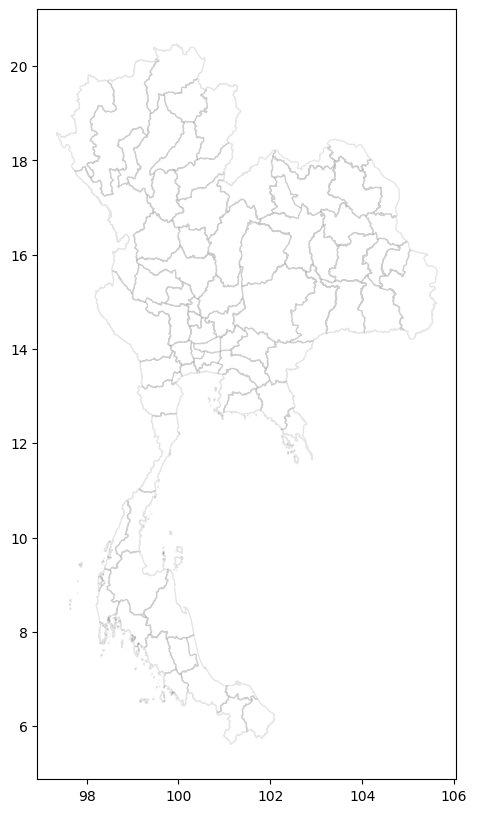

In [ ]:
thailandmap = gpd.read_file('Data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}

fig, ax = plt.subplots(figsize=(10,10))
thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0,alpha = 0.1)
xr_ref['cap_SPP_wind'].where(xr_ref['cap_SPP_wind']>0).plot(ax = ax,zorder = 1,cmap="Blues")
xr_ref['cap_SPP_solar'].where(xr_ref['cap_SPP_solar']>0).plot(ax = ax,zorder = 3,cmap="Reds")
xr_ref['cap_SPP_biomass'].where(xr_ref['cap_SPP_biomass']>0).plot(ax = ax,zorder = 5,cmap="Greens")

fig2, ax2 = plt.subplots(figsize=(10,10))
thailandmap.plot(ax = ax2, color='none', edgecolor = 'black', zorder = 0,alpha = 0.1)
xr_ref['cap_VSPP_wind'].where(xr_ref['cap_VSPP_wind']>0).plot(ax = ax2,zorder = 2,cmap="Blues")
xr_ref['cap_VSPP_solar'].where(xr_ref['cap_VSPP_solar']>0).plot(ax = ax2,zorder = 4,cmap="Reds")
xr_ref['cap_VSPP_biomass'].where(xr_ref['cap_VSPP_biomass']>0).plot(ax = ax2,zorder = 6,cmap="Greens")

fig3, ax3 = plt.subplots(figsize=(10,10))
thailandmap.plot(ax = ax3, color='none', edgecolor = 'black', zorder = 0,alpha = 0.1)
xr_ref['cap_SPP_wind'].where(xr_ref['cap_SPP_wind']>0).plot(ax = ax3,zorder = 1,cmap="Blues")
xr_ref['cap_SPP_solar'].where(xr_ref['cap_SPP_solar']>0).plot(ax = ax3,zorder = 3,cmap="Reds")
xr_ref['cap_SPP_biomass'].where(xr_ref['cap_SPP_biomass']>0).plot(ax = ax3,zorder = 5,cmap="Greens")

xr_ref['cap_VSPP_wind'].where(xr_ref['cap_VSPP_wind']>0).plot(ax = ax3,zorder = 2,cmap="Blues")
xr_ref['cap_VSPP_solar'].where(xr_ref['cap_VSPP_solar']>0).plot(ax = ax3,zorder = 4,cmap="Reds")
xr_ref['cap_VSPP_biomass'].where(xr_ref['cap_VSPP_biomass']>0).plot(ax = ax3,zorder = 6,cmap="Greens")


In [ ]:
province = "Kalasin"
province = thailandmap.loc[thailandmap['ADM1_EN'] == province]
print(province.unary_union.bounds)
min_lon = province.unary_union.bounds[0]
max_lon = province.unary_union.bounds[2]
max_lat = province.unary_union.bounds[3]
min_lat = province.unary_union.bounds[1]

(103.09676066900005, 16.181673239000077, 104.24064016800008, 17.101957866000078)


<xarray.Dataset>
Dimensions:           (lat: 22, lon: 28)
Coordinates:
  * lat               (lat) float64 16.22 16.26 16.3 16.34 ... 17.01 17.05 17.09
  * lon               (lon) float64 103.1 103.2 103.2 ... 104.2 104.2 104.2
Data variables: (12/36)
    lccs_class        (lat, lon) float32 3.442e+03 3.179e+03 ... 3.545e+03
    SI_BGEC           (lat, lon) float64 0.738 0.9803 0.9931 ... 0.6371 0.6362
    SI_Biomass        (lat, lon) float64 0.738 1.004 0.9931 ... 0.6371 0.639
    SI_Solar          (lat, lon) float64 0.709 0.9353 0.971 ... 0.5934 0.437
    SI_Wind           (lat, lon) float64 0.4412 0.6107 0.6098 ... 0.2928 0.2466
    SI_BGWW           (lat, lon) float64 0.738 0.9803 0.9931 ... 0.6371 0.6362
    ...                ...
    cap_SPP_bgww      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    cap_VSPP_bgww     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    cap_SPP_msw       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    cap_VSP

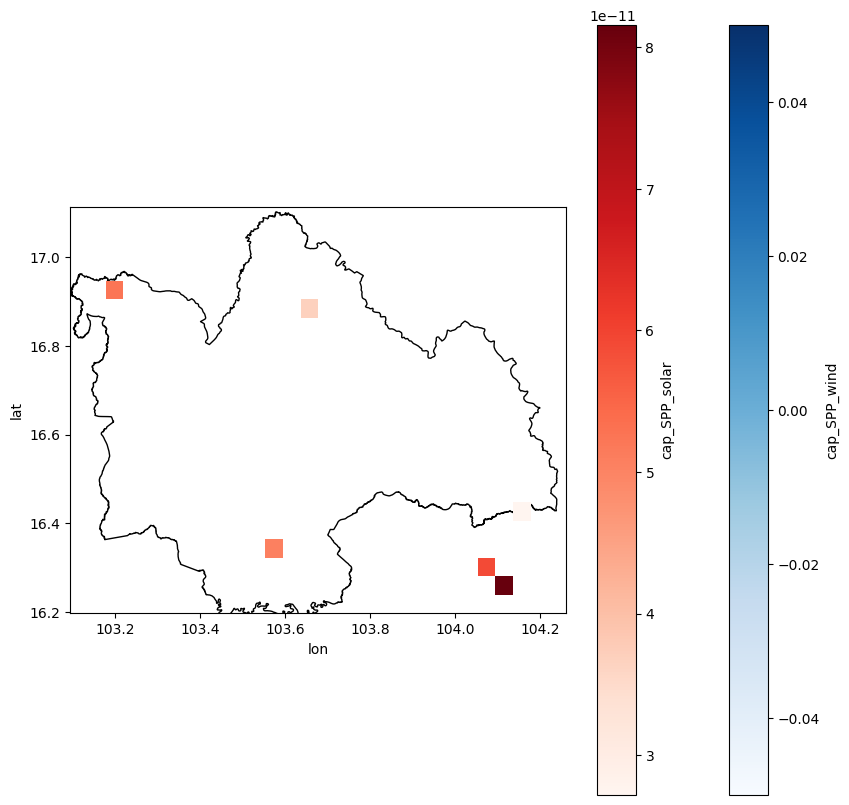

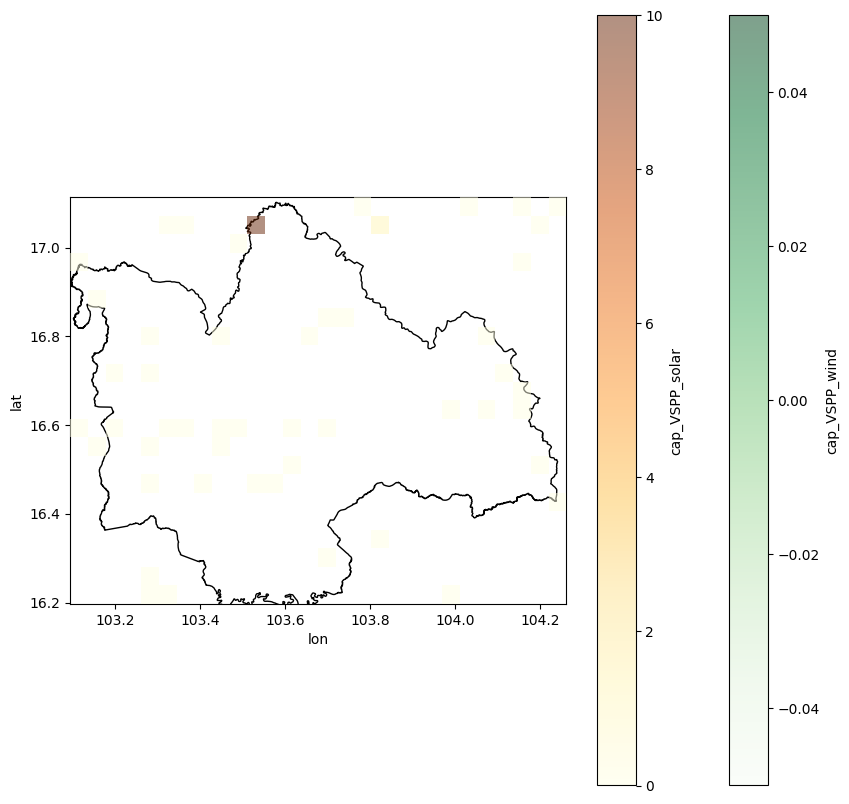

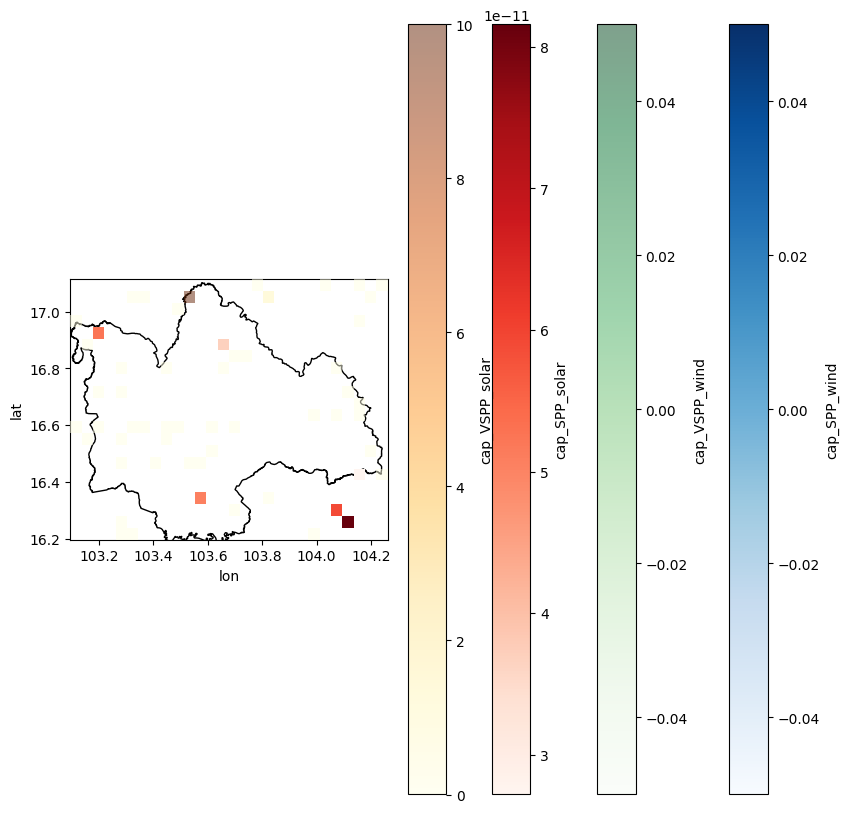

In [ ]:
xr_buffer = xr_ref.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon,max_lon))
print(xr_buffer)

fig, ax = plt.subplots(figsize=(10,10))
province.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
xr_buffer['cap_SPP_wind'].where(xr_buffer['cap_SPP_wind']>0).plot(ax = ax,zorder = 1,cmap="Blues")
xr_buffer['cap_SPP_solar'].where(xr_buffer['cap_SPP_solar']>0).plot(ax = ax,zorder = 3,cmap="Reds")

fig2, ax2 = plt.subplots(figsize=(10,10))
province.plot(ax = ax2, color='none', edgecolor = 'black', zorder = 0)
xr_buffer['cap_VSPP_wind'].where(xr_buffer['cap_VSPP_wind']>0).plot(ax = ax2,zorder = 2,cmap="Greens",alpha = 0.5)
xr_buffer['cap_VSPP_solar'].where(xr_buffer['cap_VSPP_solar']>0).plot(ax = ax2,zorder = 4,cmap="YlOrBr",alpha = 0.5)

fig3, ax3 = plt.subplots(figsize=(10,10))
province.plot(ax = ax3, color='none', edgecolor = 'black', zorder = 0)
xr_buffer['cap_SPP_wind'].where(xr_buffer['cap_SPP_wind']>0).plot(ax = ax3,zorder = 1,cmap="Blues")
xr_buffer['cap_VSPP_wind'].where(xr_buffer['cap_VSPP_wind']>0).plot(ax = ax3,zorder = 2,cmap="Greens",alpha = 0.5)
xr_buffer['cap_SPP_solar'].where(xr_buffer['cap_SPP_solar']>0).plot(ax = ax3,zorder = 3,cmap="Reds")
xr_buffer['cap_VSPP_solar'].where(xr_buffer['cap_VSPP_solar']>0).plot(ax = ax3,zorder = 4,cmap="YlOrBr",alpha = 0.5)